In [2]:
import pylhe
import numpy as np
import matplotlib.pyplot as plt
from tqdm import *

%matplotlib inline

In [3]:
def pT(p):
    return np.sqrt(getattr(e.particles[-1],'px')**2 + getattr(e.particles[-1],'py')**2)

In [4]:
m_ary = [500,1000,3000,5000,7000,10000,50000,100000]
# m_ary = [500,1000,3000,5000,7000,10000]

colors = ['cornflowerblue','forestgreen','maroon','goldenrod','gray','mediumseagreen','brown','black']

In [5]:
nevts = 20000
pT_ary_tch = np.zeros((len(m_ary), nevts))

for im, m in tqdm(enumerate(m_ary)):
    for ie, e in enumerate(pylhe.readLHE('../MG5_aMC_v2_5_2/bin/tchannel_direct_'+str(m)+'/Events/run_01/unweighted_events.lhe')):
#     for ie, e in enumerate(pylhe.readLHE('../MG5_aMC_v2_5_2/bin/tchannel_total_'+str(m)+'/Events/run_01/unweighted_events.lhe')):
        if ie == nevts: break
        pT_ary_tch[im, ie] = (pT(e.particles[-1]))

8it [00:24,  3.10s/it]


In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 9,5


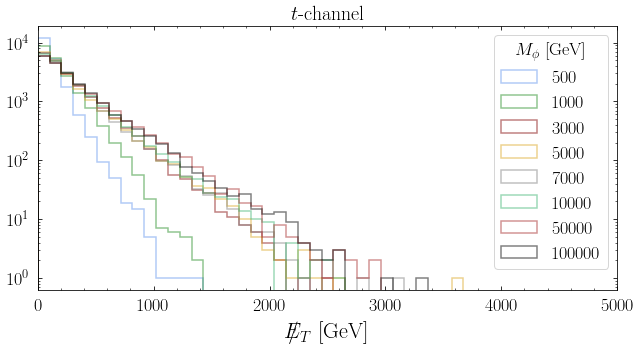

In [7]:
for im, m in enumerate(m_ary):
    plt.hist(pT_ary_tch[im], histtype='step', bins = np.linspace(0,5000,50),alpha=.5,lw=1.5, label=str(m), color=colors[im]);
plt.yscale("log")
plt.xlabel(r'$\slash \!\!\!\! E_{T}$ [GeV]')
plt.xlim(0,5000)
legend = plt.legend(title="$M_\phi$ [GeV]");
plt.setp(legend.get_title(),fontsize=18)
plt.title("$t$-channel",fontsize=20)
plt.tight_layout()
plt.savefig("mtchParton.pdf")

In [8]:
nevts = 20000
pT_ary_Zp = np.zeros((len(m_ary), nevts))

for im, m in tqdm(enumerate(m_ary)):
    for ie, e in enumerate(pylhe.readLHE('../MG5_aMC_v2_5_2/bin/zprime_direct_'+str(m)+'/Events/run_01/unweighted_events.lhe')):
        pT_ary_Zp[im, ie] = (pT(e.particles[-1]))

8it [00:26,  3.25s/it]


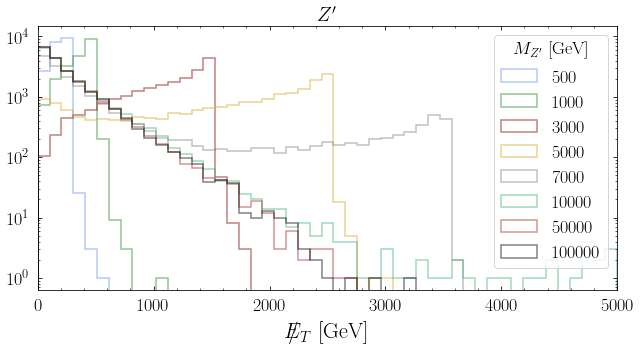

In [9]:
for im, m in enumerate(m_ary):
    plt.hist(pT_ary_Zp[im], histtype='step', bins = np.linspace(0,5000,50),alpha=.5,lw=1.5, label=str(m), color=colors[im]);
plt.yscale("log")
plt.xlabel(r'$\slash \!\!\!\! E_{T}$ [GeV]')
plt.xlim(0,5000)
legend = plt.legend(title="$M_{Z^\prime}$ [GeV]");
plt.setp(legend.get_title(),fontsize=18)
plt.title("$Z^\prime$",fontsize=20)
plt.tight_layout()
# plt.savefig("mZpParton.pdf")

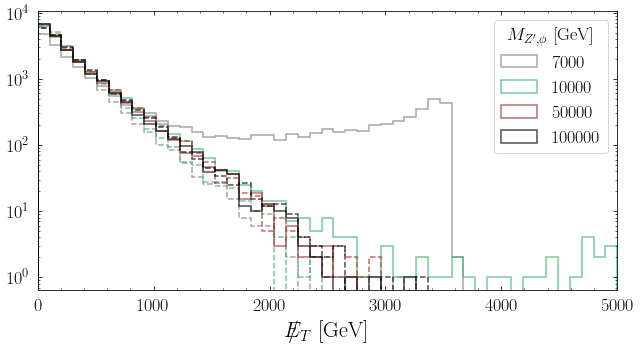

In [26]:
for im, m in enumerate(m_ary):
    if im > 3:
        plt.hist(pT_ary_tch[im], histtype='step', bins = np.linspace(0,5000,50),alpha=.7,lw=1.5, ls='--', color=colors[im]);
        plt.hist(pT_ary_Zp[im], histtype='step', bins = np.linspace(0,5000,50),alpha=.7,lw=1.5, label=str(m), color=colors[im]);


plt.yscale("log")
plt.xlabel(r'$\slash \!\!\!\! E_{T}$ [GeV]')
plt.xlim(0,5000)
legend = plt.legend(title="$M_{Z^\prime,\phi}$ [GeV]");
plt.setp(legend.get_title(),fontsize=18)
# plt.title("$M_{Z^\prime,\phi}=10$ TeV",fontsize=20)
plt.tight_layout()
# plt.savefig("mZptch100TeVParton.pdf")

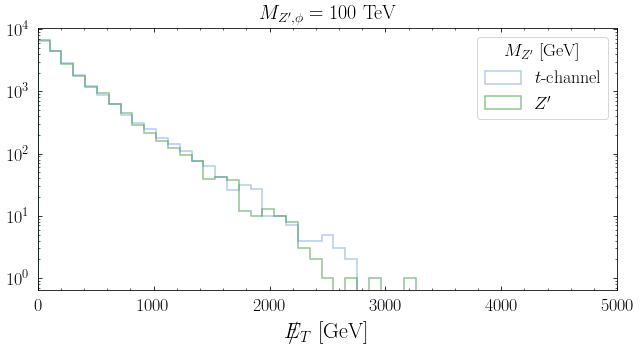

In [154]:
plt.hist(pT_ary_tch[-1], histtype='step', bins = np.linspace(0,5000,50),alpha=.5,lw=1.5, label="$t$-channel");
plt.hist(pT_ary_Zp[-1], histtype='step', bins = np.linspace(0,5000,50),alpha=.5,lw=1.5, label="$Z^\prime$");


plt.yscale("log")
plt.xlabel(r'$\slash \!\!\!\! E_{T}$ [GeV]')
plt.xlim(0,5000)
legend = plt.legend(title="$M_{Z^\prime}$ [GeV]");
plt.setp(legend.get_title(),fontsize=18)
plt.title("$M_{Z^\prime,\phi}=100$ TeV",fontsize=20)
plt.tight_layout()
plt.savefig("mZptch100TeVParton.pdf")